1it [00:04,  4.83s/it]


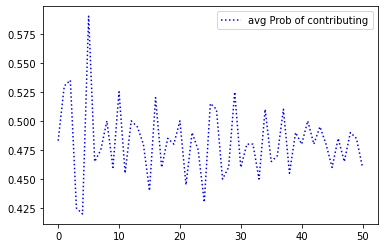

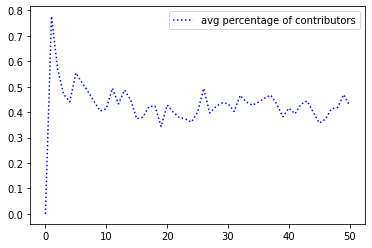

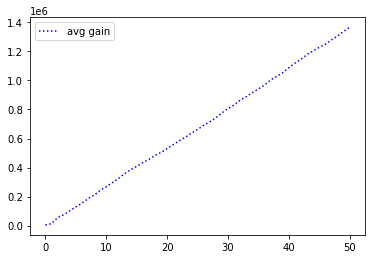

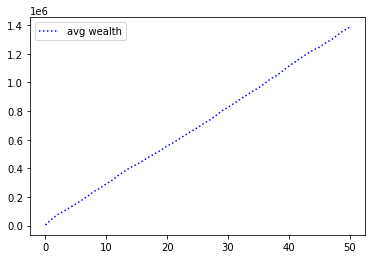

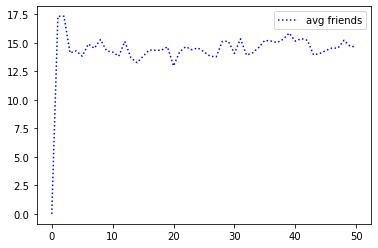

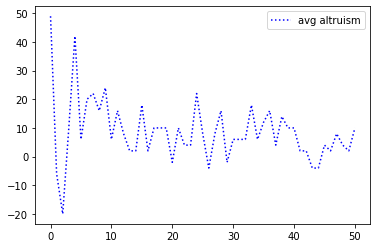

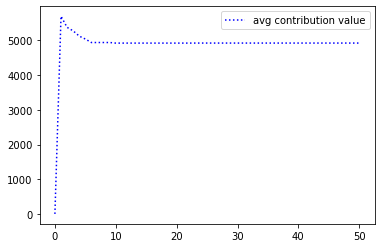

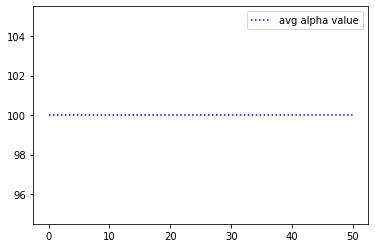

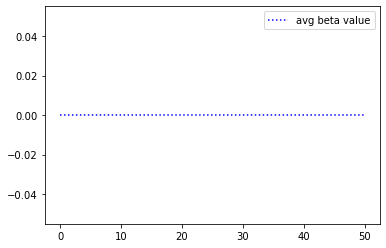

In [1]:
"""**************TODO:9/20/22*******************************
-update altruism formulation in write up
-update write up to reflect intelligent agent formalisms
-explore viability of prisoners dillema for strategy change
-maybe a wealth cap?
-add more parameters (punishment values, probability of initial connection,
probability of initial sharing)
-update so that RmaC of the cm list is used in the probability of attack
-randomize probability of success

**************CHANGES:11/22/22******************************
-updated ALE to include AV and EF
-Added punishment variation of monetary gain
-removed a few bugs in punishment method
-added punish cost and penalty as parameters
-
"""

import matplotlib.pyplot as plt
import mesa_old.SharingNetwork.boltzmann_wealth_model_network.model as sn
import numpy as np
import pandas as pd
from mesa_old.batchrunner import BatchRunner as br


def column(matrix, i):
    return [row[i] for row in matrix]


avgs = []
color = ["b:", "g:", "r:", "k:", "m:"]
ng = [7, 8]
nm = [7, 8]
paf = [0.4, 0.6]
num_steps = 50
model = sn.DefenderNetworkModel
params = {
    "num_groups": 5,
    "num_members": 20,
    "prob_add_friend": 0.4,
    "punish": 1,
    "alphaM": 100,
    "betaM": 0,
    "punish_cost": 50,
    "penalty": 100,
}
reports = {"time_data": model.datacollect}


results = br(
    model,
    fixed_parameters=params,
    iterations=1,
    max_steps=num_steps,
    model_reporters=reports,
)
results.run_all()
mod_data = results.get_model_vars_dataframe()


# time_data[0].desired_attribute[step #][agent #]
def sumData(data):
    avgs = []
    for i in range(len(data)):
        avgs.append(sum(data[i]) / len(data[i]))
    return avgs


def display(y, glabel):
    plt.plot(y, color[0], label=glabel)
    plt.legend()
    plt.show()


y1 = [sumData(mod_data.time_data[0].prob_of_contr), "avg Prob of contributing"]
y2 = [sumData(mod_data.time_data[0].freeriders), "avg percentage of contributors"]
y3 = [sumData(mod_data.time_data[0].gain), "avg gain"]
y4 = [sumData(mod_data.time_data[0].wealth), "avg wealth"]
y5 = [sumData(mod_data.time_data[0].friends), "avg friends"]
y6 = [sumData(mod_data.time_data[0].altruism), "avg altruism"]
y7 = [sumData(mod_data.time_data[0].contribution_value), "avg contribution value"]
y8 = [sumData(mod_data.time_data[0].alpha), "avg alpha value"]
y9 = [sumData(mod_data.time_data[0].beta), "avg beta value"]

"""print("========== cm ===========")
print(mod_data.time_data[0].cmlist[1])
print("========== attacks ===========")
print(mod_data.time_data[0].attlist[1])"""

axis = [y1, y2, y3, y4, y5, y6, y7, y8, y9]
for y in axis:
    display(y[0], y[1])
# nx.draw_networkx(mod_data.time_data[0].graph[0])

cm = np.array(mod_data.time_data[0].cmlist)
att = np.array(mod_data.time_data[0].attlist)
np.swapaxes(cm, 0, 0)
np.swapaxes(att, 0, 0)

# Store data as .csv
dict = {"Countermeasures": cm, "Attacks": att}
df = pd.DataFrame(dict)

# saving the dataframe
# df.to_csv('file1.csv')